## definitions and imports


In [1]:
# imports
from numbers import Number
from typing import Sequence, Callable, Union
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
import warnings


In [2]:
# function definitions
def f(x: Sequence) -> Sequence:
    return np.array(
        [10 * pow(x[0], 4) + 3 * pow(x[0], 3) - 30 * x[0] * x[0] + 10 * x[0]]
    )


def g(x: Sequence) -> Sequence:
    return np.array(
        [
            10 * pow(x[1], 4)
            + 10 * pow(x[0], 4)
            + 3 * pow(x[0], 3)
            - 30 * x[0] * x[0]
            + 10 * x[0]
        ]
    )


def f_gradient(x: Sequence) -> Sequence:
    return np.array([40 * pow(x[0], 3) + 9 * pow(x[0], 2) - 60 * x[0] + 10])


def g_gradient(x: Sequence) -> Sequence:
    return np.array(
        [40 * pow(x[0], 3) + 9 * pow(x[0], 2) - 60 * x[0] + 10, 40 * pow(x[1], 3)]
    )


## plotting


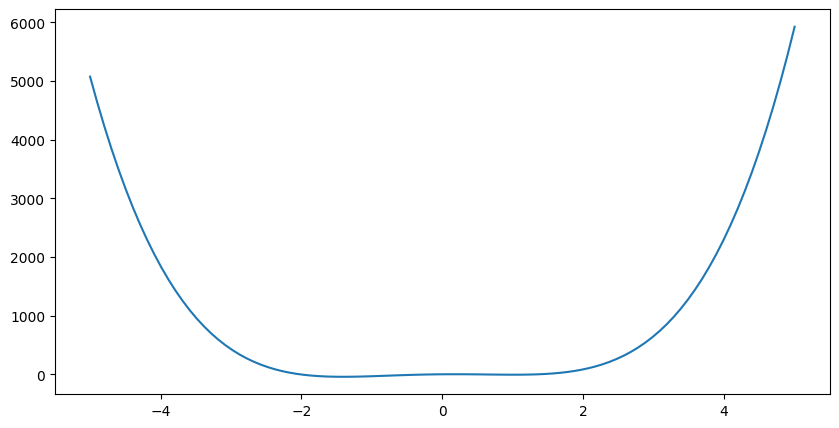

In [3]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, [f([x]) for x in x])


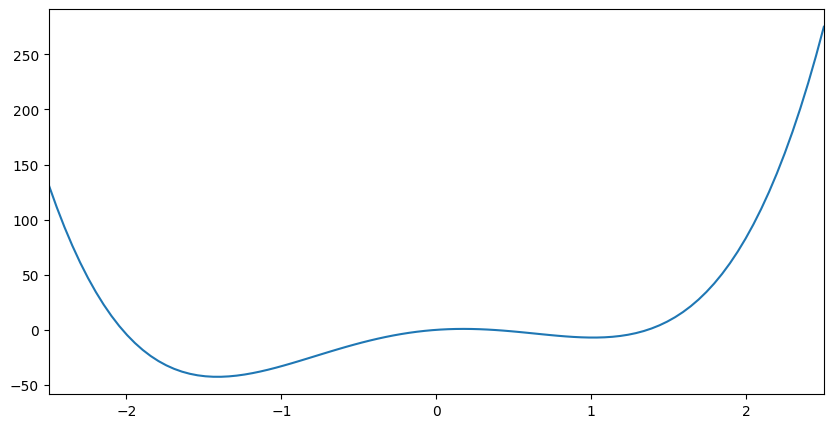

In [4]:
# f(x) plot
x = np.linspace(-2.5, 2.5, 100)
fig = plt.figure(figsize=(10, 5))
plt.xlim([-2.5, 2.5])
plt.plot(x, [f([x]) for x in x])


/tmp/ipykernel_19137/322108751.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


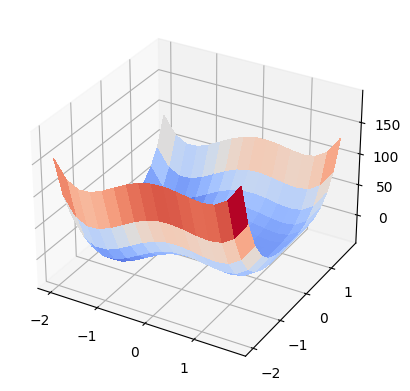

In [5]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection="3d")

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()


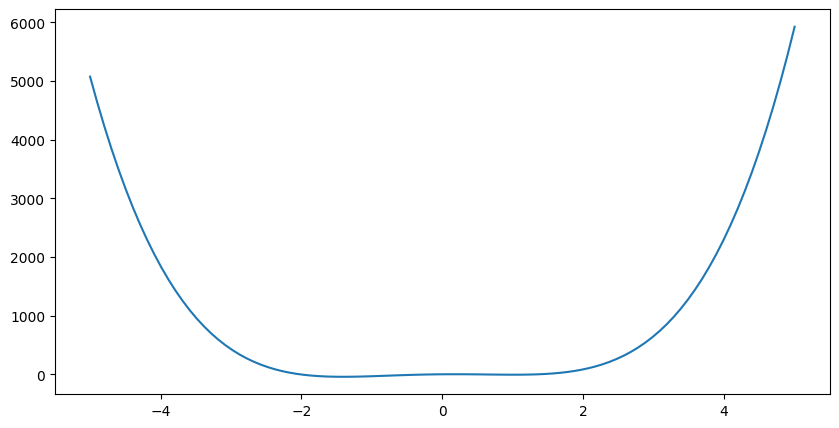

In [6]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, [f([x]) for x in x])


/tmp/ipykernel_19137/511080830.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


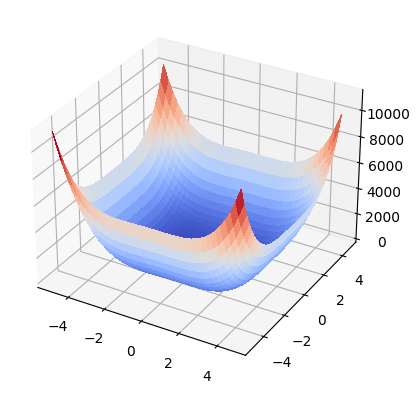

In [7]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection="3d")

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()


## optimalisation


In [8]:
# external values to evalute implemented algorithm
f_global_min = [-1.41237]
f_local_min = [1.01255]
g_global_min = [-0.71458, 0]
g_local_min = [1.15151, 0.5227]
max_iter = 5000
eps=0.01

In [9]:
def stop_test(gradient_at_point: Sequence, eps: Number) -> bool:
    # stationary point test
    return np.linalg.norm(gradient_at_point) <= eps


def gradient_descend(
    gradient: Callable, starting_point: Sequence, step: Number, eps=0.01, max_iter=5000
) -> Union[Sequence, int]:
    point = starting_point
    iteration_counter = 0
    found_minimum = False
    while not found_minimum:
        gradient_at_point = gradient(point)
        point -= gradient_at_point * step
        found_minimum = stop_test(gradient_at_point, eps)
        iteration_counter += 1
        if iteration_counter >= max_iter:
            break
    return point, iteration_counter


class RangeError(Exception):
    pass


def run_optimization(function: Callable, arguments: Sequence):
    """return function called with arguments or raise Error when RunTimeException occurs"""
    with warnings.catch_warnings():
        warnings.filterwarnings("error")
        try:
            return function(*arguments)
        except Warning:
            raise RangeError


In [10]:
# run optimalisation demo
arguments = (g_gradient, [-1, -2], 10 ** (-1), 0.1)
try:
    run_optimization(gradient_descend, arguments)
except RangeError:
    print(" renage error!!")

try:
    arguments = (f_gradient, [-20], 10 ** (-4))
    print(run_optimization(gradient_descend, arguments))
except RangeError:
    print(" renage error!!")


 renage error!!
(array([1.01267974]), 1010)


## tools to analize


In [11]:
def generate_steps(bigger_version=False):
    base = [10**x for x in range(-7, 0)]
    if not bigger_version:
        return base
    exponents = []
    for element in base:
        exponents += [element * coefficient for coefficient in range(1, 10)]
    return exponents


In [18]:
from enum import Enum


class PointEvaluation(Enum):
    global_min = 0
    local_min = 1
    calculation_error = 2
    not_reached = 3


def distance_to_minimum(found_point: Sequence, minimum: Sequence):
    return np.linalg.norm(found_point, minimum)


def evaluate_optimization(
    found_point: Sequence,
    global_minimum: Sequence,
    local_minimum: Sequence,
    tolerance=0.01,
):
    if np.linalg.norm(found_point - global_minimum) < tolerance:
        return PointEvaluation.global_min
    elif np.linalg.norm(found_point - local_minimum) < tolerance:
        return PointEvaluation.local_min
    return PointEvaluation.not_reached


## analysis

### general case

In [13]:
from random import randint

def plot_general_case_range(lower_boundary: int, upper_boundary, amount_outer_iter=40):
    results = {}
    steps = generate_steps()
    id = 1
    for _ in range(amount_outer_iter):
        starting_point = [randint(lower_boundary, upper_boundary)]
        for step in steps:
            try:
                arguments = (f_gradient, starting_point, step, eps, max_iter)
                minimum, iterations = run_optimization(gradient_descend, arguments)
                point_eval = evaluate_optimization(minimum, f_global_min, f_local_min)
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": iterations,
                    "minimum": minimum,
                    "point_eval": point_eval,
                }
            except RangeError:
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": None,
                    "minimum": None,
                    "point_eval": PointEvaluation.calculation_error,
                }
            id += 1

    comparison = {}
    for key in results:
        row = results[key]
        step = row["step"]
        if step not in comparison:
            comparison[step] = {
                "global" :{
                    "iterations": [],
                    "minimum": []
                    },
                "local" :{
                    "iterations": [],
                    "minimum": []
                },
                "not_reached" :{
                    "occurrences": 0,
                },
                "calc_error" :{
                    "occurrences": 0,
                }
            }
        if row["point_eval"] == PointEvaluation.global_min:
            # comparison[step]["global"]["occurrences"] += 1 
            comparison[step]["global"]["iterations"].append(row["iterations"]) 
            comparison[step]["global"]["minimum"].append(row["minimum"]) 
        elif row["point_eval"] == PointEvaluation.local_min:
            # comparison[step]["local"]["occurrences"] += 1 
            comparison[step]["local"]["iterations"].append(row["iterations"])
            comparison[step]["local"]["minimum"].append(row["minimum"])
        elif row["point_eval"] == PointEvaluation.not_reached:
            comparison[step]["not_reached"]["occurrences"] += 1 
        else:
            comparison[step]["calc_error"]["occurrences"] += 1
            
    
    fig, ax = plt.subplots()
    width = 0.1
    x = ["global", "local", "not_reached", "calc_error"]

    widths = [None] * 7
    widths[0] =  np.arange(len(x))
    for i in range(1, 7):
        widths[i] = [x + width for x in widths[i-1]]

    for exponent in range(1, 8):
        step_data = comparison[10**(-exponent)]
        y = [
            len(step_data["global"]["iterations"]),
            len(step_data["local"]["iterations"]),
            step_data["not_reached"]["occurrences"],
            step_data["calc_error"]["occurrences"],
        ]
        ax.bar(widths[exponent-1], y, width=width, label=f"-{exponent}")
        

    plt.xticks([r + width for r in range(len(x))], x)
    plt.legend()
    plt.title("quantity of each result kind for each step exponent")

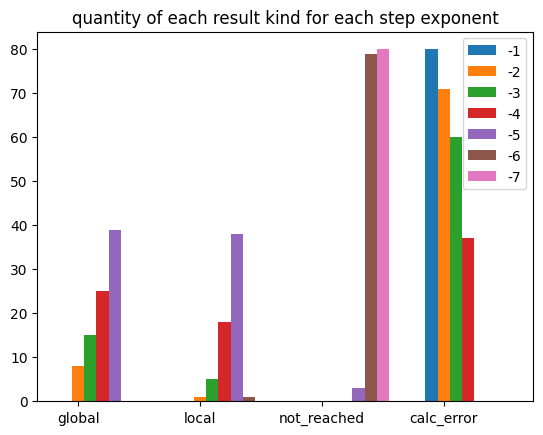

In [14]:
plot_general_case_range(-40, 40, 80)

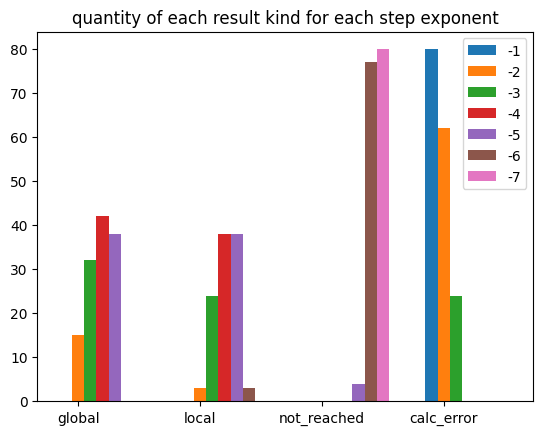

In [15]:
plot_general_case_range(-10, 10, 80)

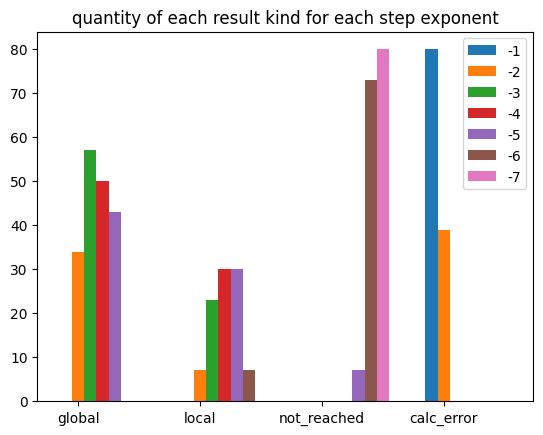

In [16]:
plot_general_case_range(-5, 5, 80)

#### conclusions
- too small steps - 10e-7, 10,e-6 result in not reaching minimum, they require too many iterations so calculations are too expensive, and may not provide minimum
- too big steps - 10e-1, 10e-2 result in "throwing out of function's minimum neighborhood" - minimum won't be found
- starting point closer to global minimum tend too get stack more often in local minimum, calculation errors are less frequent, they are still present with big steps - *thrown out of minimum neighborhood*

### amount of iterations

In [38]:
from random import randint

def plot_iterations_range(lower_boundary: int, upper_boundary, amount_outer_iter=40):
    results = {}
    steps = generate_steps()
    id = 1
    for _ in range(amount_outer_iter):
        starting_point = [randint(lower_boundary, upper_boundary)]
        for step in steps:
            try:
                arguments = (f_gradient, starting_point, step, eps, max_iter)
                minimum, iterations = run_optimization(gradient_descend, arguments)
                point_eval = evaluate_optimization(minimum, f_global_min, f_local_min)
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": iterations,
                    "minimum": minimum,
                    "point_eval": point_eval,
                }
            except RangeError:
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": None,
                    "minimum": None,
                    "point_eval": PointEvaluation.calculation_error,
                }
            id += 1

    comparison = {}
    for key in results:
        row = results[key]
        step = row["step"]
        if step not in comparison:
            comparison[step] = {
                "global" :{
                    "iterations": [],
                    "distance": []
                    },
                "local" :{
                    "iterations": [],
                    "minimum": []
                },
                "not_reached" :{
                    "occurrences": 0,
                },
                "calc_error" :{
                    "occurrences": 0,
                }
            }
        if row["point_eval"] == PointEvaluation.global_min:
            comparison[step]["global"]["iterations"].append(row["iterations"]) 
            distance = distance_to_minimum(row["starting_point"], f_global_min)
            comparison[step]["global"]["distance"].append(distance) 

            
    
    fig, ax = plt.subplots()
    width = 0.1
    x = ["global", "local", "not_reached", "calc_error"]

    for exponent in range(1, 8):
        step_data = comparison[10**(-exponent)]

        x= step_data["global"]["distance"]
        y = step_data["global"]["iterations"]
        ax.scatter(x, y, label=f"10^-{exponent}")
        ax.set_xlabel("distance from start. point to min.")
        ax.set_ylabel("iterations")
        

    plt.legend()
    plt.title("iterations depending on start. point dist to min. if found g. min")

/home/wojtek/.local/lib/python3.10/site-packages/numpy/linalg/linalg.py:2564: RuntimeWarning: divide by zero encountered in power
  absx **= ord


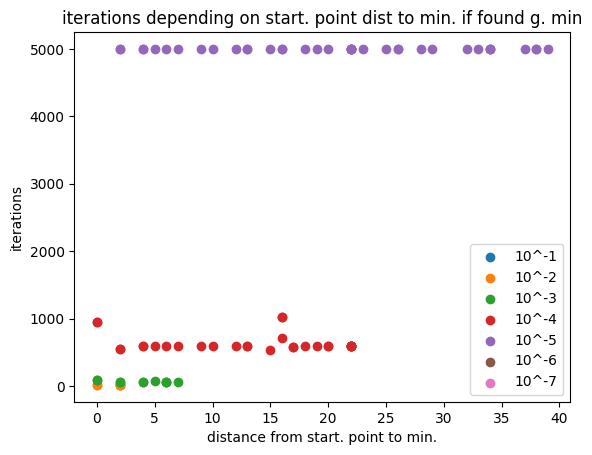

In [39]:
plot_iterations_range(-40, 40, 80)

### conclusions
- small steos

In [67]:
from random import randint

def plot__box_iterations_range(lower_boundary: int, upper_boundary, amount_outer_iter=40):
    results = {}
    steps = generate_steps()
    id = 1
    for _ in range(amount_outer_iter):
        starting_point = [randint(lower_boundary, upper_boundary)]
        for step in steps:
            try:
                arguments = (f_gradient, starting_point, step, eps, max_iter)
                minimum, iterations = run_optimization(gradient_descend, arguments)
                point_eval = evaluate_optimization(minimum, f_global_min, f_local_min)
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": iterations,
                    "minimum": minimum,
                    "point_eval": point_eval,
                }
            except RangeError:
                results[id] = {
                    "step": step,
                    "starting_point": starting_point,
                    "iterations": None,
                    "minimum": None,
                    "point_eval": PointEvaluation.calculation_error,
                }
            id += 1

    comparison = {}
    for key in results:
        row = results[key]
        step = row["step"]
        if step not in comparison:
            comparison[step] = {
                "global" :{
                    "iterations": [],
                    "distance": []
                    },
                "local" :{
                    "iterations": [],
                    "minimum": []
                },
                "not_reached" :{
                    "occurrences": 0,
                },
                "calc_error" :{
                    "occurrences": 0,
                }
            }
        if row["point_eval"] == PointEvaluation.global_min:
            comparison[step]["global"]["iterations"].append(row["iterations"]) 
            distance = distance_to_minimum(row["starting_point"], f_global_min)
            comparison[step]["global"]["distance"].append(distance) 

            
    
    fig, ax = plt.subplots()
    width = 0.1
    
    data = []
    for exponent in range(2, 5):
        step_data = comparison[10**(-exponent)]

        x= step_data["global"]["distance"]
        y = step_data["global"]["iterations"]
        data.append(y)
    
    ax.boxplot(data, vert=0)
    
    ax.set_yticklabels([f"10e-{x}"] for x in range(2,5))

    plt.legend()
    plt.title("box plot")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


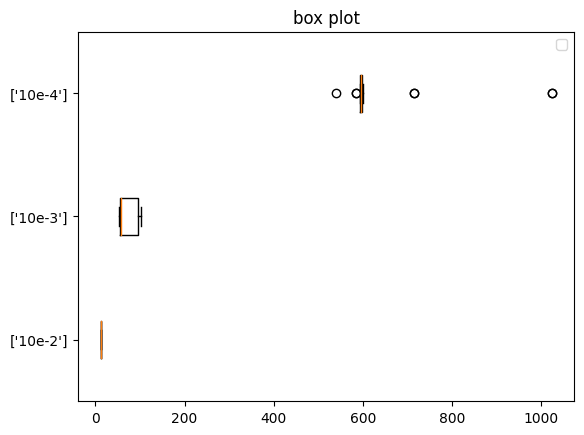

In [68]:
plot__box_iterations_range(-20, 20, 40)